- TITLE: Lecture 03 - Chapter 2


[Previous lecture](./lecture-02.ipynb)


# Conversion

We previously looked at a mole balance and asked questions like:

-   What is the exit concentration of some species?
-   How large a reactor do we need to reduce the concentration to some level?

In these questions, there is no natural bound on the concentrations. There could be scenarios with orders of magnitude difference in the values, e.g. 1M vs 0.01M. It is difficult to assess whether an answer is reasonable like this. It is nicer to think about the questions in a different way:

-   What fraction of reactants have reacted in the reactor?
-   How large a reactor do we need to convert 90% of the reactants to products?

The fraction here will be bounded between 0 and 1.


## The definition of conversion

For the reaction  $a A + b B \rightarrow c C + d D$ , we call the little letters the stoichiometric coefficients. We need to specify a species as the *basis* for defining conversion, and make sure the stoichiometric coefficient on that species is 1. Let's choose A as the basis, and normalize the reaction like this:

 $A + \frac{b}{a} B \rightarrow \frac{c}{a}C + \frac{d}{a}D$ 

Now, we define the conversion:

 $X_A = \frac{\textrm{Moles of A reacted}}{\textrm{Moles of A fed}}$ 

The maximum this conversion can be is 1, if all the moles of A fed are reacted. For a single reaction, we often drop the subscript and just use  $X$ .

For a batch reactor, the moles of A fed is just the initial moles of A in the reactor  $N_{A0}$ . The number of moles that have reacted is the *difference* between the number of moles initially in the reactor, and the moles currently in the reactor, i.e.  $N_{A0} - N_A$ .

So:

 $X = \frac{N_{A0}-N_A}{N_{A0}}$ 

or, to find the number of moles of A in the reactor at some conversion:

 $N_A = N_{A0}(1-X)$ 


## Conversion in the batch reactor Ch 2.2

Recall the mole balance on the batch reactor is:

 $\frac{dN_A}{dt} = r_A V$ 

If you substitute the expression for  $N_A$ in terms of  $X$ , we can convert this equation to:

 $\frac{dX}{dt} = \frac{-r_A V}{N_{A0}}$ 


### Find the time to achieve 99% conversion

If a first order reaction occurs in a constant volume batch reactor with a rate constant of 0.23 1/min, how long does it take to reach a conversion of 99%?

This means:   $-r_A = k C_A$ . Since we have constant volume, we can write  $C_A = C_{A0}(1 - X)$ . The equation we have to solve becomes:

 $\frac{dX}{dt} = \frac{-k C_{A0}(1 - X)}{C_{A0}}$ 

or, after canceling the initial concentrations, and separating the equation we get:

 $t = \int_0^{0.99}\frac{1}{k} \frac{dX}{1-X}$ 



In [24]:
from scipy.integrate import quad

k = 0.23  # 1/min

def integrand(X):
    return 1 / k * 1 / (1 - X)

X1 = 0
X2 = 0.999
ans, err = quad(integrand, X1, X2)

print('It takes {:1.2f} minutes to reach a conversion of {}.'.format(ans, X2))

It takes 30.03 minutes to reach a conversion of 0.999.


In [21]:
print(err)
b = quad(integrand, X1, X2)
print(b[0])

4.027520874111076e-10
20.02247906951344


Suppose we want to explore how the time varies with conversion. You could vary the value of X2 in the block above, and run the block over and over. We can use the notebook to make an interactive block with a slider that we can use to explore this problem. Try running and moving the slider bar in this block.



In [25]:
from ipywidgets import interact

def reaction_time(X2):
    ans, err = quad(integrand, X1, X2)    
    return 'It takes {:1.2f} minutes to reach a conversion of {}.'.format(ans, X2)

xmin = 0
xmax = 1
step = 0.01
interact(reaction_time, X2=(xmin, xmax, step));

'It takes 7.97 minutes to reach a conversion of 0.84.'

What about plotting the time as a function of conversion? Recall to make a plot, we need an array of conversions (the x-axis), and a corresponding array of times (the y-axis). It is easy to get the array of conversions using np.linspace. But, we need to solve for t for each value of that array. The quad function can only take single numbers as arguments for the limits of integration, so we cannot give it the array of conversions. We can "vectorize" a function though that will operate on every element of an array. The @np.vectorize syntax means to "decorate" the following function so that it will work on arrays in an element-wise way, and work on single numbers the same way it did before.



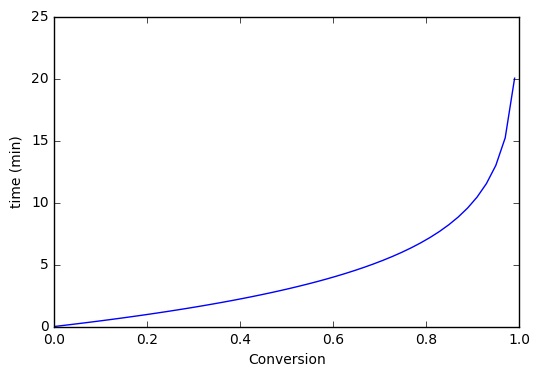

In [11]:
import numpy as np

X = np.linspace(0, 0.99)

@np.vectorize
def reaction_time(X):
    ans, err = quad(integrand, 0, X)    
    return ans

t = reaction_time(X)

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, t)
plt.xlabel('Conversion')
plt.ylabel('time (min)')

You can see here that the time rapidly increases as the conversion approaches 1. You can see the time must go to  $\infty$ as we approach 1 in the integrand.

There are many ways you could approach the problem above that do not require vectorization, but require knowledge of other python syntax. We can use list comprehension to evaluate a function for every value in the conversion array.



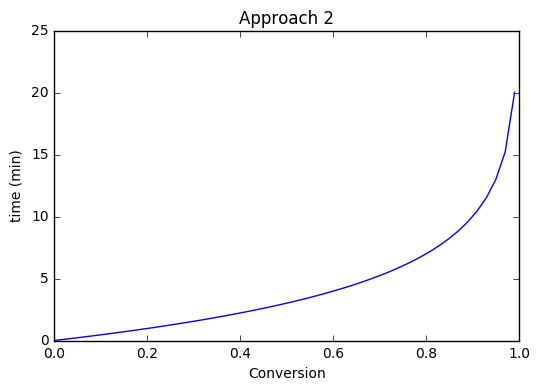

In [12]:
t2 = [reaction_time(x) for x in X]  # Here is the list comprehension

plt.plot(X, t2)
plt.title('Approach 2')
plt.xlabel('Conversion')
plt.ylabel('time (min)')

An old-fashioned approach using a for loop with temporary counter variable to get the i<sup>th</sup> conversion element, compute the time for it, and append it to a list.



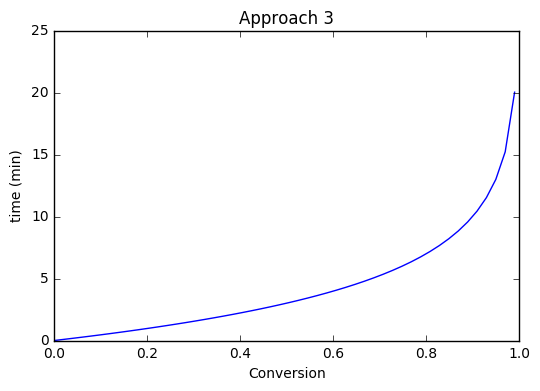

In [13]:
t3 = []
for i in range(len(X)):
    x = X[i]  # get the ith value of the X array
    tz = reaction_time(x)
    t3.append(tz)  # accumulate the values

plt.plot(X, t3)
plt.title('Approach 3')
plt.xlabel('Conversion')
plt.ylabel('time (min)')

These approaches all result in the same thing, but require different knowledge of Python syntax. You should look at each one and ask which one is easier to read and understand? Which one is easier to write? The answers to those should affect which approach you decide to use in problem solving later.


# Conversion in flow reactors Ch 2.3

In flow reactors (CSTR, PFR) we still define the conversion as

 $X_A = \frac{\textrm{Moles of A reacted}}{\textrm{Moles of A fed}}$ 

but we use molar flows and get

 $F_A = F_{A0}(1 - X)$ 

as our working equation.

For liquid systems,  $F_A = \nu C_A$ where  $\nu$ is the volumetric flowrate. **Memorize this**.

For gas systems, that is also true, but we have to remember that the concentration depends on the pressure and temperature like this:

 $C_A = \frac{P_A}{R T}$ **Memorize this**.


## Application to a CSTR

It is common to ask a question like "What volume is required to achieve some conversion in a CSTR?".

At steady state the mole balance for a CSTR is:

 $F_{A0} - F_A + r_A V = 0$ 

If you substitute in the expression for conversion, and solve for V, you get:

 $V = \frac{F_{A0} X}{-r_{A, exit}}$ .

Note that we have to evaluate the reaction rate at the exit. Why? The reactor is well-mixed, so the rate at the exit is the same as the rate in the reactor. This particular example only requires some evaluation. Suppose we know  $F_{A0} = 3$ mol/min, with a volumetric flow of two L/min. The reaction is  $A \rightarrow B$ , with a rate law of  $-r_A = k C_A^2$ ( $k = 0.1$ L/mol/min). What volume is required to achieve 95% conversion of A? 



In [14]:
k = 0.1  # L / mol / min
Fa0 = 3  # mol / min
v0 = 2   # L / min

X = 0.95

Fa = Fa0 * (1 - X) # Exit molar flow
Ca = Fa / v0       # Exit concentration

ra = -k * Ca**2

V = (Fa0 * X) / -ra

print('A volume of {:1.2f} L is required to reach a conversion of {}.'.format(V, X))

A volume of 5066.67 L is required to reach a conversion of 0.95.


Other problems are variations of what is known and unknown. 

**Exercise**: Given a reactor with a volume of 3000 L, compute the exit conversion for the reaction above. (exit conversion is about 0.51)
Hint: Solve this equation for X

 $C_A = F_{A0} (1 - X) / \nu$ 

 $V = \frac{F_{A0} X}{k C_A^2}$ 



In [26]:
def objective(X):
    Fa = Fa0 * (1 - X)
    Ca = Fa / v0
    return V - (Fa0 * X) / (k * Ca**2)

# you finish it here
from scipy.optimize import fsolve
fsolve  # Shift-tab for a docstring


# Application to a PFR

Substitution of the conversion into the PFR equation leads to:

 $\frac{dX}{dV} = \frac{-r_A}{F_{A0}}$ 

this is directly separable and we can see here that 

 $V = F_{A0} \int_0^X \frac{dX}{-r_A}$ 

If we ask the same question here, what volume is required to reach 95% conversion, we can evaluate the integral with quad.



In [31]:
from scipy.integrate import quad, odeint

def integrand(X):
    Fa = Fa0 * (1 - X)
    Ca = Fa / v0
    ra = -k * Ca**2
    return Fa0 / -ra

Xf = 0.95
ans, _ = quad(integrand, 0, Xf)
print('A volume of {:1.2f} L is required to reach a conversion of {}.'.format(ans, Xf))

A volume of 110.14 L is required to reach a conversion of 0.95.


Note, we cannot directly integrate the differential equation because we need a volume span, and we do not know the final volume. In this case, it is possible to invert the ODE though to:

 $\frac{dV}{dX} = F_{A0} / -r_A$ 

And then integrate that from  $X=0$ to  $X=0.95$ . The initial condition is  $V(X=0) = 0$ .



In [35]:
def ode(V, X):
    # dV/dX = Fa0 / -ra
    Fa = Fa0 * (1 - X)
    Ca = Fa / v0
    ra = -k * Ca**2
    return Fa0 / -ra

import numpy as np
Xspan = np.linspace(0, 0.95, 5)
print(odeint(ode, 0, Xspan))

[[   0.        ]
 [   1.80565458]
 [   5.24499692]
 [  14.36673152]
 [ 110.14494903]]


Since we only care about the final value here, we can use an Xspan of only two points. Later we will learn how to solve this problem without needing to invert the equation. It is possible, but requires additional skills we do not have yet.

**Exercise**: Plot how the volume varies with the conversion.


# Reminders

[scipy.integrate.quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html)  for integrating a function you know the analytical form of.

 $\int_a^b f(x) dx$ is the same as `quad(f, a, b)`.

[scipy.integrate.odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) for integrating a first order ordinary differential equation.

Solving  $\frac{dy}{dx}=f(y, x)$ with $f(x0) = y0$ is solved on the range of x0 to xf with:

`odeint(f, y0, [x0, xf])`


# Summary

You should be done reading Chapter 1.

Make sure to start reading Chapter 2. You should finish it this week.

Make sure you work out each of the examples we go over in class on your own. Try to type them out yourself. It looks easy when I do it, but that does not mean you can do it yourself quickly!

[Next lecture](./lecture-04.ipynb)

